In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [53]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(file_name)

In [54]:
df.head()
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [19]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [55]:
#Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop()
df.drop('id',inplace=True, axis=1)
df.drop('Unnamed: 0',inplace=True, axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [56]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [58]:
#Replace the missing values with the mean of column
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace = True)
df.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [59]:
floors = df['floors'].value_counts()
floors.to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Text(0, 0.5, 'PRICE')

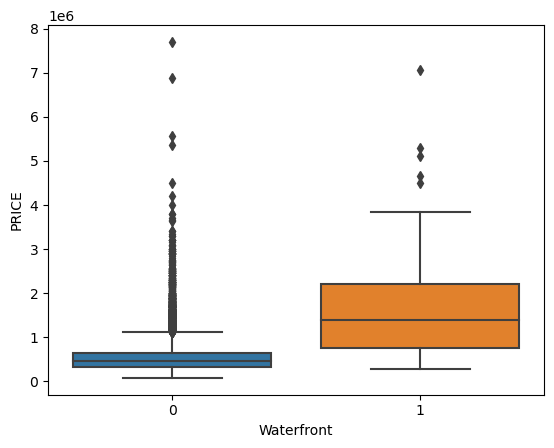

In [31]:
#Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.
sns.boxplot(x='waterfront', y='price', data=df)
plt.xlabel('Waterfront')
plt.ylabel('PRICE')

<Axes: xlabel='sqft_above', ylabel='price'>

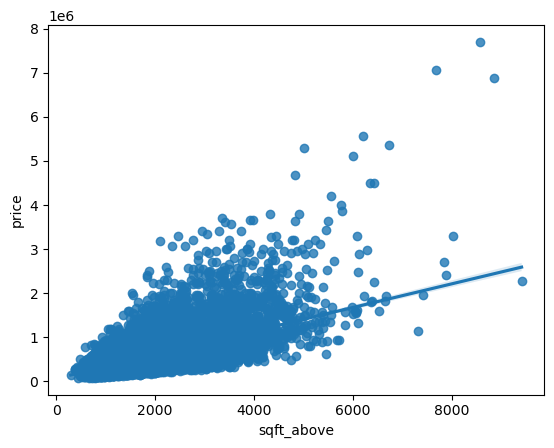

In [60]:
#Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.
sns.regplot(x='sqft_above',y='price', data=df)

In [61]:
#see which feature is most correlated with feature price
df.corr()['price'].sort_values()

C:\Users\User\AppData\Local\Temp\ipykernel_5104\2323286553.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525885
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [62]:
#MODEL DEVELOPMENT
#Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.
model=LinearRegression()
X=df[['sqft_living']]
y=df['price']
model.fit(X,y)
model.score(X,y)

0.4928532179037931

In [63]:
#Fit a linear regression model to predict the 'price' using the list of features:
#features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean,inplace=True)

X1=df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
y=df['price']
model.fit(X1,y)
model.score(X1,y)

0.6576885711683069

In [65]:
#Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
X1=df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
y=df['price']

pipe=Pipeline(Input)
pipe.fit(X1,y)
pipe.score(X1,y)



0.7513387707402615

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [69]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


,floors,waterfront,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
17801,1.0,0,47.6576,2.0,0,0,1.0,1570,920,6,920
20764,1.0,0,47.3600,4.0,420,0,2.5,1390,1564,8,1984
2285,1.0,0,47.3682,3.0,0,0,1.5,1430,1310,7,1310
13350,2.0,0,47.5159,4.0,0,0,2.5,3030,3150,9,3150
19376,2.0,0,47.5123,4.0,0,0,2.5,2260,2350,8,2350


In [68]:
#Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
RidgeModel.score(x_test,y_test)

0.6478759163939118

In [74]:
#Perform a second order polynomial transform on both the training data and testing data. 
#Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1,
#and calculate the R^2 utilising the test data provided.

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)


RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr,y_train)
RidgeModel.score(x_test_pr,y_test)


0.7002744279539594